In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from joblib import dump, load

In [22]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
all_data = pd.read_csv('/content/drive/My Drive/FakeImageDetector/dataset_drive/all_train_test_val.csv')

In [0]:
all_data = all_data.drop('Unnamed: 0', axis=1)

In [43]:
all_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '19193', '19194', '19195', '19196', '19197', '19198', '19199',
       'path_drive', 'train', 'label'],
      dtype='object', length=19203)

In [45]:
print(all_data.label.value_counts())
print(all_data.train.value_counts())
all_data.info()

0    11187
1    11185
Name: label, dtype: int64
train         13755
test           4446
validation     4171
Name: train, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22372 entries, 0 to 22371
Columns: 19203 entries, 0 to label
dtypes: int64(19201), object(2)
memory usage: 3.2+ GB


In [26]:
all_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '19193', '19194', '19195', '19196', '19197', '19198', '19199',
       'path_drive', 'train', 'label'],
      dtype='object', length=19203)

In [0]:
data_train = all_data.loc[all_data.train == 'train']
data_test = all_data.loc[all_data.train == 'test']
data_val = all_data.loc[all_data.train == 'validation']
train_labels = data_train.label
test_labels = data_test.label
val_labels = data_val.label

del all_data

In [0]:
train_Z = (data_train.drop(['path_drive','train', 'label'] , axis = 1))/255

In [0]:
# pca = PCA().fit(train_Z)


In [0]:
# from joblib import dump, load
# dump(pca, '/content/drive/My Drive/FakeImageDetector/KNN/pca.joblib') 

In [0]:
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');
# plt.grid(linestyle='--')
# plt.xlim(0, 2000)
# # plt.ylim(0.5, 1.02)
# plt.locator_params(axis='y', nbins=60)
# plt.locator_params(axis='x', nbins=60)

(13755, 550)

In [0]:
pca = PCA(n_components=550)

# Fit PCA on train_Z

train_Z_new = pca.fit_transform(train_Z)

In [50]:
train_Z_new.shape

(13755, 550)

In [51]:
dump(train_Z_new, '/content/drive/My Drive/FakeImageDetector/KNN/train_pca_all.joblib') 


['/content/drive/My Drive/FakeImageDetector/KNN/train_pca_all.joblib']

In [60]:
test_Z.shape

(13755, 19200)

In [0]:
test_Z = (data_test.drop(['path_drive','train', 'label'] , axis = 1))/255
val_z = (data_val.drop(['path_drive','train', 'label'] , axis = 1))/255
test_Z_new = pca.transform(test_Z)
val_z_new = pca.transform(val_z)

In [53]:
dump(pca, '/content/drive/My Drive/FakeImageDetector/KNN/pca550.joblib') 

['/content/drive/My Drive/FakeImageDetector/KNN/pca550.joblib']

In [36]:

del test_Z
del val_z
del train_Z

NameError: ignored

In [64]:
test_Z_new.shape
test_labels.shape

(4446,)

In [0]:
from sklearn.utils import shuffle
train_Z__sh, train_labels_sh = shuffle(train_Z_new, train_labels, random_state=0)
test_Z_sh, test_labels_sh = shuffle(test_Z_new, test_labels ,random_state=0)
val_z_sh, val_labels_sh = shuffle(val_z_new, val_labels, random_state=0)

trained on FaceSwap, tested on FaceSwap
              precision    recall  f1-score   support

           0       0.66      0.55      0.60      2210
           1       0.62      0.71      0.66      2236

    accuracy                           0.63      4446
   macro avg       0.64      0.63      0.63      4446
weighted avg       0.64      0.63      0.63      4446

[[1218  992]
 [ 640 1596]]
trained on FaceSwap, tested on FaceSwap


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


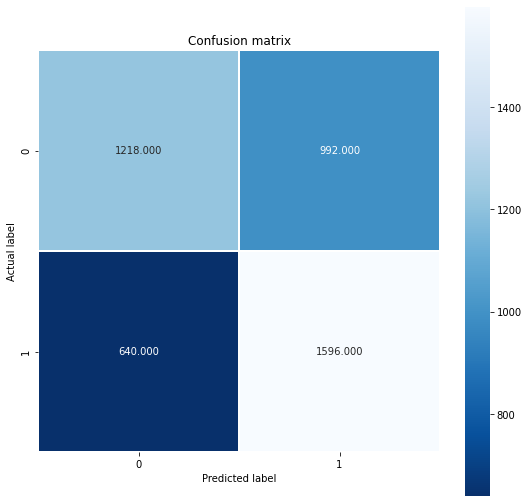

In [66]:
model = KNeighborsClassifier()
knn_res = model.fit(train_Z__sh, train_labels_sh)
y_test_pred =knn_res.predict(test_Z_sh)

from sklearn.metrics import classification_report
print('trained on FaceSwap, tested on FaceSwap')
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(test_labels_sh, y_test_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels_sh, y_test_pred, labels=[0,1]))
cm = confusion_matrix(test_labels_sh, y_test_pred, labels=[0,1])
print('trained on FaceSwap, tested on FaceSwap')
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_res.score)
plt.title("Confusion matrix");

In [0]:
generated_model_path = '/content/drive/My Drive/FakeImageDetector/KNN/all_faces_knn.pickle'
import pickle
pickle.dump(knn_res, open(generated_model_path, 'wb'))